<a href="https://colab.research.google.com/github/hyyga/Deep-Learning-GSLC-1-/blob/main/GSLC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import File

In [52]:
from google.colab import files
uploaded = files.upload()

Saving archive (9).zip to archive (9) (2).zip


In [53]:
import zipfile
import os

with zipfile.ZipFile("archive (9).zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Cek hasil ekstraksi
os.listdir()


['.config',
 'Notebook Outputs',
 'hymenoptera_data',
 'archive (9).zip',
 'archive (9) (2).zip',
 'archive (9) (1).zip',
 'sample_data']

# Library

In [94]:
# import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt

# Preprocess


In [95]:
# menentukan lokasi dataset
train_dir = "hymenoptera_data/train"
val_dir = "hymenoptera_data/val"

# mmebuat dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32
)

# Normalisasi
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 245 files belonging to 2 classes.
Found 153 files belonging to 2 classes.


In [96]:
# ''' data augmentation
# menambah variasi gambar secara acak, bertujuan untuk menghindari overhitting dam memperkaya data pelatihan.'''
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create a data generator
# datagen_train = ImageDataGenerator(
#     samplewise_center=True,  # set each sample mean to 0
#     rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#     zoom_range=0.1,  # Randomly zoom image
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,  # randomly flip images
#     vertical_flip=False,
# )

# # No need to augment validation data
# datagen_valid = ImageDataGenerator(samplewise_center=True)

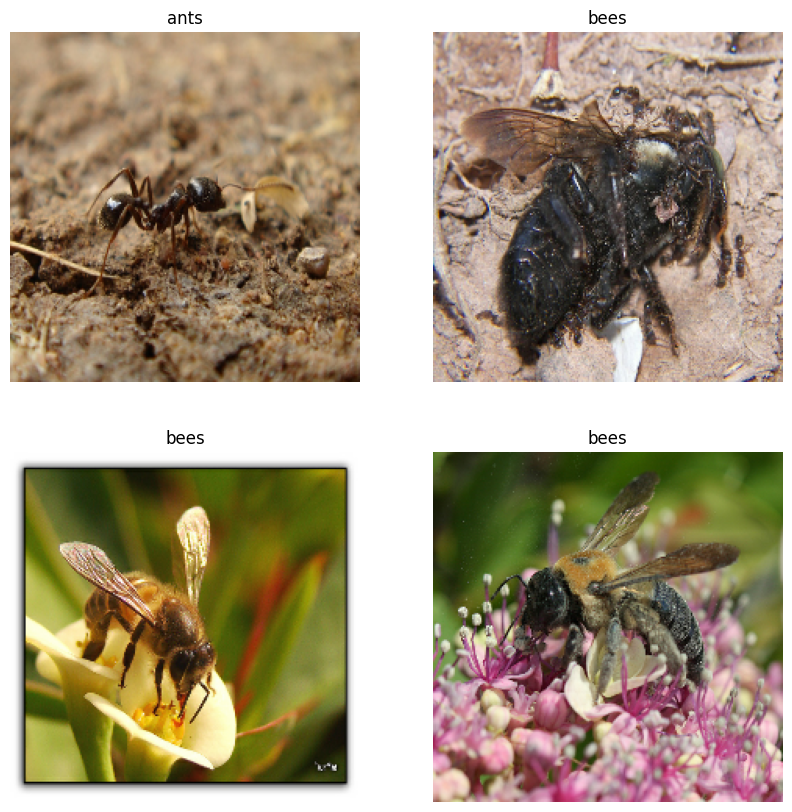

In [97]:
plt.figure(figsize=(10, 10))
class_names = ['ants', 'bees']

for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])  # tanpa astype("uint8")
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")


#CNN

In [98]:
# classic CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 kelas: ants dan bees
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

# model CNN ini digunakan karena, model dapat mengenali pola visual tanpa perlu ditentukan manual. model ini juga cenderung lebih sederhana dan cocok untuk data yang kecil.

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4515 - loss: 1.0975 - val_accuracy: 0.5425 - val_loss: 0.6713
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4726 - loss: 0.6878 - val_accuracy: 0.5556 - val_loss: 0.6501
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6466 - loss: 0.6060 - val_accuracy: 0.6144 - val_loss: 0.6717
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7091 - loss: 0.5354 - val_accuracy: 0.5948 - val_loss: 0.7385
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7674 - loss: 0.5223 - val_accuracy: 0.6667 - val_loss: 0.6074
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8863 - loss: 0.4081 - val_accuracy: 0.6667 - val_loss: 0.6581
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.8300 - loss: 0.3541 - val_accuracy: 0.6732 - val_loss: 0.6746
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8921 - loss: 0.2777 - val_accuracy: 0.6275 - val_loss: 0.8357
Epoch 9/

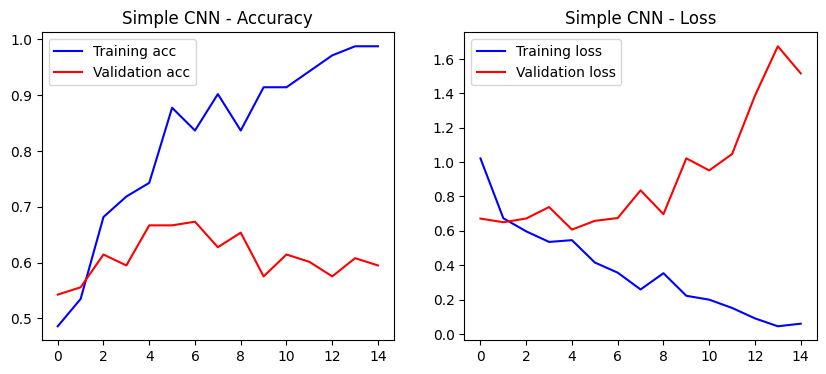

In [99]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "Simple CNN")

berdasarkan hasil analysis di dapati bahwa, model CNN yang digunakan tidak belajar dengan baik. garis biru (training accuracy) terus meningkat dari 0.5 sampai 1, hal ini menandakan bahwa model sangat bagus dalam mentraining data. namun garis merah (validation accuracy) stuck diantara 0.6 sampai 0.7 (tidak stabil). artinya model hanya mengahafal data (overhitting) dan gagal mengenali pla pada data baru.

pada grafik loss. garis biru (training loss) terus menurun hingga mendekati 0, artinya model semakin yakin dengan hasil data yang dilatih. namun garis merah (validation loss) malah semakin meningkat. artinya model semakin yakin terhadap prediksi-nya, namun sebenarnya presdiksinya salah. model tidak memiliki kemampuan untuk beradaptasi dengan data baru.

In [100]:
# MobileNetV2
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_mobilenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_mobilenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# MobileNetV2 adalah model CNN pre-trained yang sudah dilatih di dataset besar ikagenet, sehingga sudah belajar banyak pola visual umum, model ini bisa dijadikan 'basis' untuk model baru yang punya dataset yang kecil.


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6195 - loss: 0.7851 - val_accuracy: 0.8301 - val_loss: 0.3485
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9269 - loss: 0.1646 - val_accuracy: 0.9216 - val_loss: 0.2285
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9439 - loss: 0.1027 - val_accuracy: 0.9216 - val_loss: 0.3262
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9848 - loss: 0.0696 - val_accuracy: 0.9216 - val_loss: 0.2385
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9933 - loss: 0.0361 - val_accuracy: 0.9281 - val_loss: 0.2461
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 0.9281 - val_loss: 0.2329
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9281 - val_loss: 0.2309
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.9281 - val_loss: 0.2295
Epoch 9/

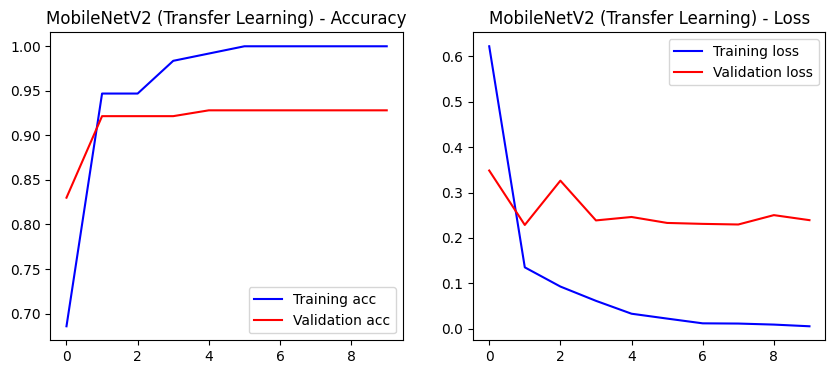

In [101]:
plot_history(history_mobilenet, "MobileNetV2 (Transfer Learning)")


berdasarkan graf yang dihasilkan, didapati bahwa model ini juga tidak belajar dengan baik.

pada graf akurasi garis biru (training accuracy) kenaikan nya sangat drastis dari 0.825 bisa melonjak ke 1 artinya model benar benar menghafal. garis merah (validation accuracy) berada di antara 0.92 sampai 0.93, cenderung tidak ada peningkatan seiring dengan bertambahnya epoch. hal ini menandakan bahwa model toda belajar secara general dan hanya menghafal model, sehingga tidak bisa memprediksi model baru.

graf loss
garis biru (training loss) mengalami penurunan dari 0.4 ke sekitar 0.05 hal ini menandakan bahwa model semakin baik dalam mempelajari data, model mampu meminimalkan error. dan garis merah (validationloss) berada di kisaran 0.17 sampai 0.25. menandakan bahwa kemampuan model dalam menggeneralisasi ke data baru tidak meningkat secara signifikan. hal ini menjadi tanda bahwa model overhitting.

# kesimpulan
model yang dilatih overhitting sehingga hasil prediksi yang di dapatkan kurang maksimal. model hanya menghafal data training dan tidak bisa memprediksi model baru. meskipun begitu model CNN menggunakan MobileNet dapat dikatakan sedikit lebih baik dibandingkan dengan menggunakna model CNN biasa. karena mobilenet memiliki akurasi yang lebih tinggi, artinya model lebih mampu mengenali data baru, dan loss nya lebih stabil. tapi perlu diingat bahwa model dengan mobilenet ini juga belum menghasilakn hasil yang maksimal, model masih overfit.